# Analysis of last.fm reports

First we'll analyze the stats for my user, `fergomes`.

For those who are not familiar, Last.fm is a service that collects and stores what you listen to on many devices. I use the service since 2006, and I had several connectors in the past, including Winamp!

On last.fm dialect, a `scrobble` is a unique track that was listened to on a period of time, and transferred to the platform.

To know more about the platform, check https://www.last.fm/

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [103]:
directory = "export_fergomes_20190330"
file = "historical_tracks_fergomes_201903300241.csv"

tracks_df = pd.read_csv(directory + "/" + file, sep=",")
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67928 entries, 0 to 67927
Data columns (total 7 columns):
Scrobble      67928 non-null int64
Date Spain    67928 non-null object
Artist        67928 non-null object
Track         67928 non-null object
Album         65572 non-null object
Loved         67928 non-null int64
Tags          67928 non-null object
dtypes: int64(2), object(5)
memory usage: 3.6+ MB


## Top 10 everything!

First, let's build simple charts with top 10 artists, albums and tracks for the whole period

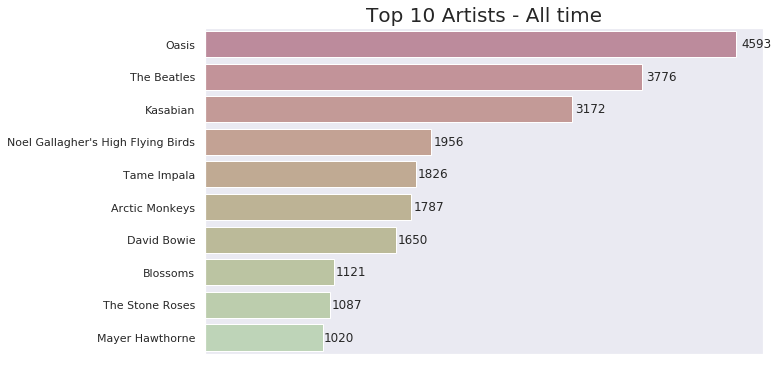

In [93]:
top_artists = Counter(tracks_df['Artist'])
top_10_artists = top_artists.most_common(10)

x_artists = [item[0] for item in top_10_artists]
y_artists = [item[1] for item in top_10_artists]

sns.set()
plt.subplots(figsize=(10, 6))
ch = sns.cubehelix_palette(n_colors=10, start=0.5, rot=1.8, light=0.8, dark=0.6, reverse=True)

artists_plot = sns.barplot(y_artists, x_artists, palette=ch)
artists_plot.axes.get_xaxis().set_visible(False)
artists_plot.set_title('Top 10 Artists - All time', fontsize=20)
for p in artists_plot.patches:
    artists_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

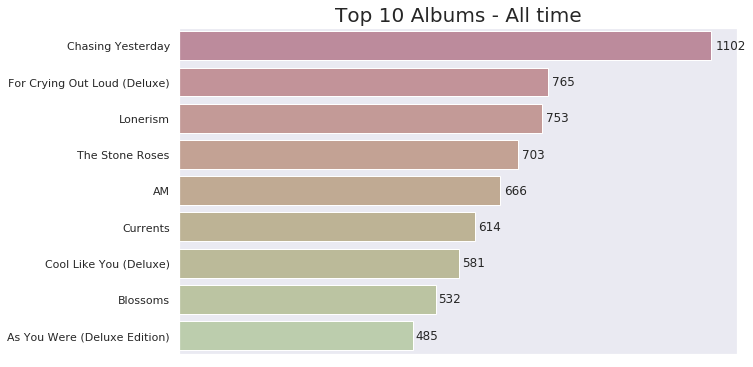

In [94]:
top_albums = Counter(tracks_df['Album'])
top_10_albums = top_albums.most_common(10)

x_albums = [item[0] for item in top_10_albums]
y_albums = [item[1] for item in top_10_albums]

plt.subplots(figsize=(10, 6))
albums_plot = sns.barplot(y_albums, x_albums, palette=ch)
albums_plot.axes.get_xaxis().set_visible(False)
albums_plot.set_title('Top 10 Albums - All time', fontsize=20)
for p in albums_plot.patches:
    albums_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

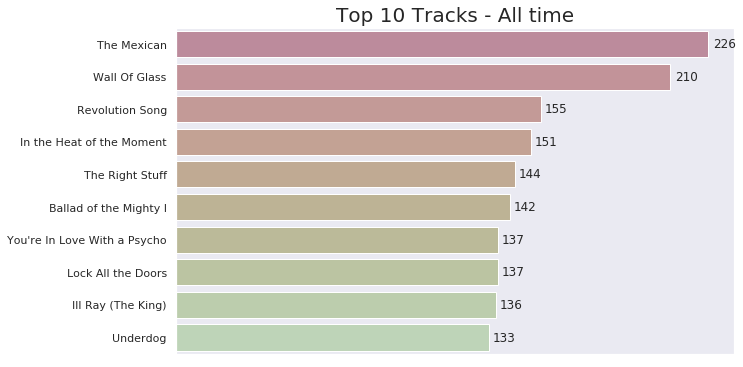

In [95]:
top_tracks = Counter(tracks_df['Track'])
top_10_tracks = top_tracks.most_common(10)

x_tracks = [item[0] for item in top_10_tracks]
y_tracks = [item[1] for item in top_10_tracks]

plt.subplots(figsize=(10, 6))
tracks_plot = sns.barplot(y_tracks, x_tracks, palette=ch)
tracks_plot.axes.get_xaxis().set_visible(False)
tracks_plot.set_title('Top 10 Tracks - All time', fontsize=20)
for p in tracks_plot.patches:
    tracks_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

## How obsessed am I?

Let's check the distribution of artists, albums and tracks, to see if I listen too much of one thing in regard os others.

In [97]:
counter_artists = top_artists.most_common(100)
x_art = [item[0] for item in counter_artists]
y_art = [item[1] for item in counter_artists]

counter_albums = top_albums.most_common(101)
x_alb = [item[0] for item in counter_albums[1:]]
y_alb = [item[1] for item in counter_albums[1:]]

counter_tracks = top_tracks.most_common(100)
x_tra = [item[0] for item in counter_tracks]
y_tra = [item[1] for item in counter_tracks]

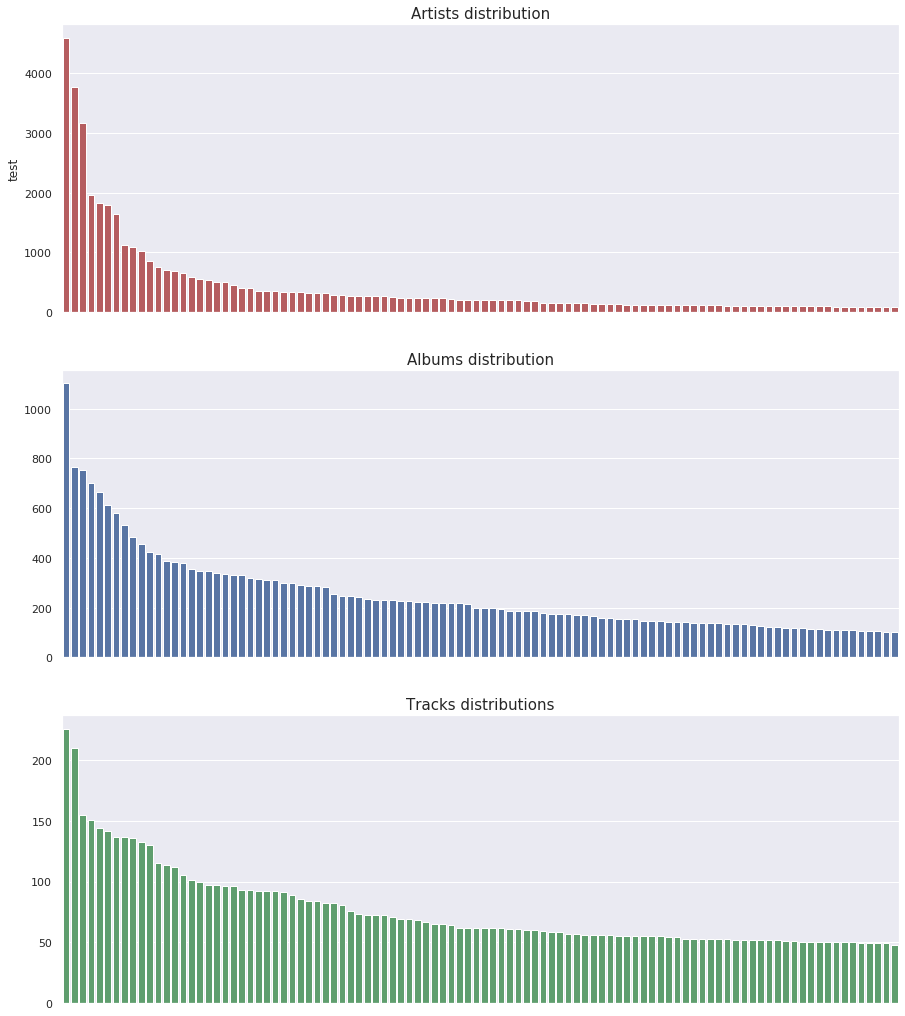

In [101]:
plt.subplots(figsize=(15, 18))

plt.subplot(3, 1, 1)
artists_dist = sns.barplot(x_art, y_art, color="r")
artists_dist.set_ylabel("Number of scrobbles per artist")
artists_dist.axes.get_xaxis().set_visible(False)
artists_dist.set_title('Artists distribution', fontsize=15)

plt.subplot(3, 1, 2)
albums_dist = sns.barplot(x_alb, y_alb, color="b")
albums_dist.set_ylabel("Number of scrobbles per album")
albums_dist.axes.get_xaxis().set_visible(False)
albums_dist.set_title('Albums distribution', fontsize=15)

plt.subplot(3, 1, 3)
tracks_dist = sns.barplot(x_tra, y_tra, color="g")
tracks_dist.set_ylabel("Number of scrobbles per track")
tracks_dist.axes.get_xaxis().set_visible(False)
tracks_dist.set_title('Tracks distributions', fontsize=15)

plt.show()

So, I have a high concentration of artists, however the distribution on albums and tracks are smoother. The albums and tracks are more evenly distributed on